## Practical-13: Write a program to demonstrate the working of autoassociative memory.

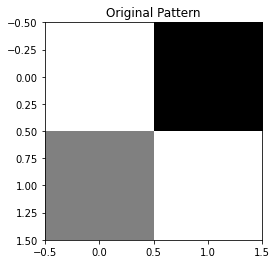

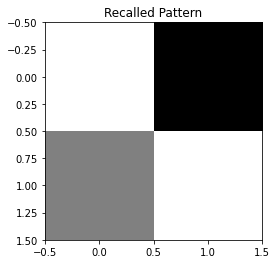

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class HopfieldNetwork:
    def __init__(self, size):
        self.size = size
        self.weights = np.zeros((size, size))

    def train(self, patterns):
        for pattern in patterns:
            pattern = np.array(pattern).reshape((self.size, 1))
            self.weights += np.outer(pattern, pattern)
            np.fill_diagonal(self.weights, 0)

    def recall(self, pattern, max_iterations=100):
        pattern = np.array(pattern).reshape((self.size, 1))
        for _ in range(max_iterations):
            net_input = np.dot(self.weights, pattern)
            pattern = np.sign(net_input)
        return pattern.flatten()

def display_pattern(pattern, title):
    plt.imshow(pattern.reshape(int(np.sqrt(len(pattern))), -1), cmap='gray')
    plt.title(title)
    plt.show()

if __name__ == "__main__":
    patterns = [
        [1, -1, 1, -1],
        [-1, 1, -1, 1],
        [1, 1, 1, 1]
    ]

    size_of_pattern = len(patterns[0])
    hopfield_net = HopfieldNetwork(size_of_pattern)
    hopfield_net.train(patterns)

    test_pattern = [1, -1, 0, 1]
    recalled_pattern = hopfield_net.recall(test_pattern)

    display_pattern(np.array(test_pattern), "Original Pattern")
    display_pattern(recalled_pattern, "Recalled Pattern")
